(-3.141592653589793, 3.141592653589793)

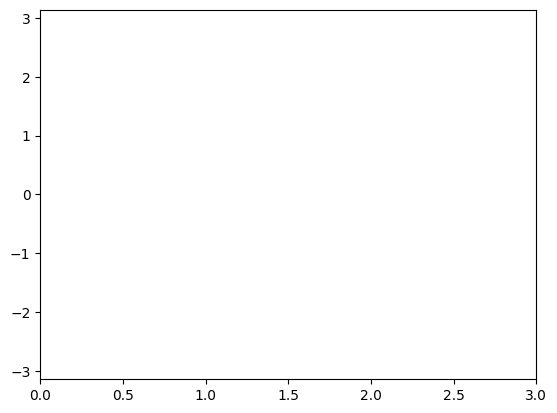

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import time
import os
from sympy import diff, symbols, integrate, Rational, solve, Pow, limit, pi, cos, sin, summation

os.environ['ffmpeg'] = 'E:/ffmpeg/ffmpeg-7.0.2-essentials_build/bin/ffmpeg'
plt.rcParams['animation.ffmpeg_path'] = 'E:/ffmpeg/ffmpeg-7.0.2-essentials_build/bin/ffmpeg'
plt.rcParams['savefig.bbox'] = 'tight'

x_range = np.linspace(0, 3, 30)
t_range = np.linspace(0, np.pi/2*10, 200)

x, t, j = symbols("x t j")
a = 1
y = (((1 - 3/(a**2 * pi**3 * 100 - 3*pi))*cos(a*pi*t/3) + 3*cos(t/10)/(a**2*pi**3*100-3*pi))*sin(pi*x/3) +
     summation( ((- 3/(a**2 * (j*pi)**3 * 100 - 3*pi*j)) * cos(a*pi*t*j/3) + 3*cos(t/10)/(a**2*(pi*j)**3*100-3*pi*j)
                )*sin(pi*x*j/3) , (j, 2, 20)) +
cos(t/10) - x/3*cos(t/10))

y_diff = diff(y, t)
#print(y.subs({x:0}))
#print(y.subs({x:3}))
#print(y.subs({t:0}))
#print(y_diff.subs({t:0}))


fig, ax = plt.subplots()
line, = ax.plot([], [], lw=1,)
ax.set_xlim(0, 3)
ax.set_ylim(-np.pi, np.pi)

In [2]:

def updater(tt):
    print(tt)
    return [y.evalf(n=2, subs={x:r, t:tt}) for r in x_range]
y_x = [updater(i) for i in t_range]

0.0
0.07893448878366315
0.1578689775673263
0.23680346635098942
0.3157379551346526
0.39467244391831574
0.47360693270197884
0.552541421485642
0.6314759102693052
0.7104103990529683
0.7893448878366315
0.8682793766202946
0.9472138654039577
1.0261483541876208
1.105082842971284
1.1840173317549472
1.2629518205386103
1.3418863093222735
1.4208207981059366
1.4997552868895998
1.578689775673263
1.6576242644569261
1.7365587532405893
1.8154932420242524
1.8944277308079154
1.9733622195915785
2.0522967083752417
2.131231197158905
2.210165685942568
2.289100174726231
2.3680346635098943
2.4469691522935575
2.5259036410772207
2.604838129860884
2.683772618644547
2.76270710742821
2.8416415962118733
2.9205760849955364
2.9995105737791996
3.0784450625628628
3.157379551346526
3.236314040130189
3.3152485289138522
3.3941830176975154
3.4731175064811786
3.5520519952648417
3.630986484048505
3.709920972832168
3.7888554616158308
3.867789950399494
3.946724439183157
4.025658927966821
4.104593416750483
4.183527905534147
4.26

In [11]:
print(len(y_x))

200


In [12]:
text = ax.text(2, 2.5, '', 
               horizontalalignment='center', 
               verticalalignment='center',  
               fontsize=12)
def update_plot(frame):
    new_y = y_x[frame-1]
    line.set_data(x_range, new_y)
    text.set_text(f't=: {t_range[frame-1]}')
    return line, text

ani = animation.FuncAnimation(
    fig, update_plot, frames=200, interval=10
)
Writer = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
print(Writer.bin_path())
ani.save('animation2.mp4', writer=Writer)
# Показываем анимацию
plt.show()

E:/ffmpeg/ffmpeg-7.0.2-essentials_build/bin/ffmpeg
